In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score

import lightgbm as lgb

from LC_functions import print_def, success_rates, lift_chart, cost_plot, recall_plot

pd.options.display.max_columns = 2000
pd.options.display.max_rows = 200

In [2]:
# Load datasets and dummy-out objects
df_train = pd.read_csv("lending_club_sample_preprocessed_train.csv")
df_test = pd.read_csv("lending_club_sample_preprocessed_test.csv")
df_validate = pd.read_csv("lending_club_sample_preprocessed_validate.csv")
df_biased = pd.read_csv("lending_club_biased_preprocessed.csv")

In [3]:
LGBM_drop_cols = ["loan_status"]+list(df_train.select_dtypes(include='object').columns)

df_train = df_train.drop(labels=LGBM_drop_cols, axis=1)
df_test = df_test.drop(labels=LGBM_drop_cols, axis=1)
df_validate = df_validate.drop(labels=LGBM_drop_cols, axis=1)
df_biased = df_biased.drop(labels=LGBM_drop_cols, axis=1)

In [4]:
X_train = df_train.drop(labels=["target"], axis=1)
X_test = df_test.drop(labels=["target"], axis=1)

y_train = df_train.target
y_test = df_test.target

In [5]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6243, number of negative: 43757
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8488
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 184
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.124860 -> initscore=-1.947191
[LightGBM] [Info] Start training from score -1.947191


LGBMClassifier()

In [6]:
y_pred=clf.predict(X_test)

In [7]:
accuracy= accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9912


Max Accuracy cutoff: 0.34


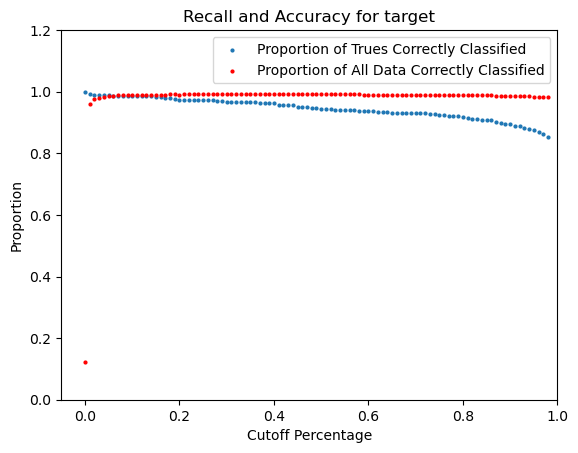

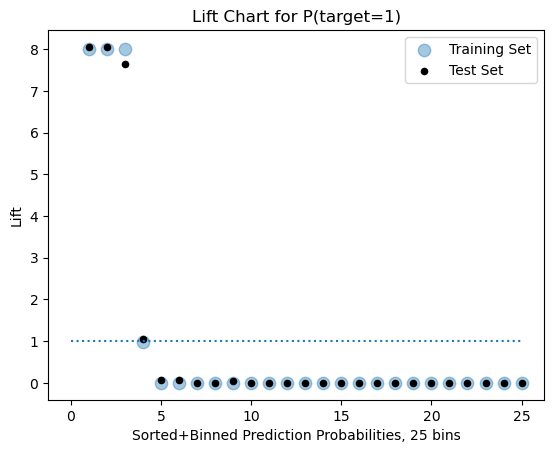

Max Accuracy cutoff: 0.34
Min cost cutoff: 0.08


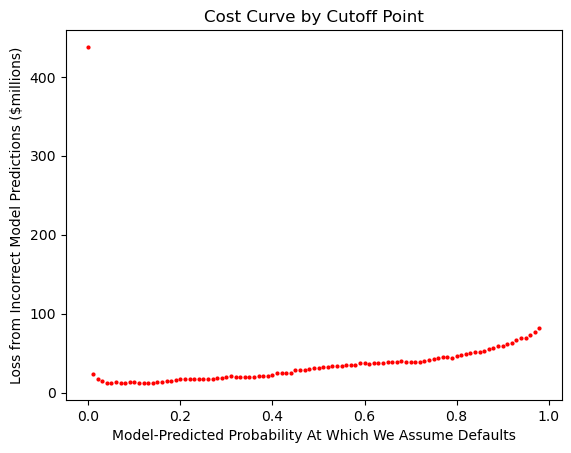

In [10]:
recall_plot(clf, X_test, y_test)
lift_chart(clf, X_train, X_test, y_train, y_test, bins=25)
cost_plot(clf, X_test, y_test)